In [3]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#Reading from CSV File and Storing in Dataframe
X_train = pd.read_csv("../../Dataset/x_train_all.csv")
y_train = pd.read_csv('../../Dataset/y_train_all.csv')
X_test = pd.read_csv('../../Dataset/x_test_all.csv')
y_test = pd.read_csv('../../Dataset/y_test_all.csv')


In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
y_train_0 = pd.read_csv("../../Dataset/OnevrsAll/0_vrs_all/y_train_0.csv")
y_train_1 = pd.read_csv("../../Dataset/OnevrsAll/1_vrs_all/y_train_1.csv")
y_train_2 = pd.read_csv("../../Dataset/OnevrsAll/2_vrs_all/y_train_2.csv")
y_train_3 = pd.read_csv("../../Dataset/OnevrsAll/3_vrs_all/y_train_3.csv")
y_train_4 = pd.read_csv("../../Dataset/OnevrsAll/4_vrs_all/y_train_4.csv")
y_train_5 = pd.read_csv("../../Dataset/OnevrsAll/5_vrs_all/y_train_5.csv")
y_train_6 = pd.read_csv("../../Dataset/OnevrsAll/6_vrs_all/y_train_6.csv")
y_train_7 = pd.read_csv("../../Dataset/OnevrsAll/7_vrs_all/y_train_7.csv")
y_train_8 = pd.read_csv("../../Dataset/OnevrsAll/8_vrs_all/y_train_8.csv")
y_train_9 = pd.read_csv("../../Dataset/OnevrsAll/9_vrs_all/y_train_9.csv")

In [7]:
y_test_0 = pd.read_csv("../../Dataset/OnevrsAll/0_vrs_all/y_test_0.csv")
y_test_1 = pd.read_csv("../../Dataset/OnevrsAll/1_vrs_all/y_test_1.csv")
y_test_2 = pd.read_csv("../../Dataset/OnevrsAll/2_vrs_all/y_test_2.csv")
y_test_3 = pd.read_csv("../../Dataset/OnevrsAll/3_vrs_all/y_test_3.csv")
y_test_4 = pd.read_csv("../../Dataset/OnevrsAll/4_vrs_all/y_test_4.csv")
y_test_5 = pd.read_csv("../../Dataset/OnevrsAll/5_vrs_all/y_test_5.csv")
y_test_6 = pd.read_csv("../../Dataset/OnevrsAll/6_vrs_all/y_test_6.csv")
y_test_7 = pd.read_csv("../../Dataset/OnevrsAll/7_vrs_all/y_test_7.csv")
y_test_8 = pd.read_csv("../../Dataset/OnevrsAll/8_vrs_all/y_test_8.csv")
y_test_9 = pd.read_csv("../../Dataset/OnevrsAll/9_vrs_all/y_test_9.csv")

In [8]:
def cor_matrix(name):
    y_name = f'y_train_{name}'
    if y_name in globals():  
        X_train[name] = globals()[y_name]
    X_train[name] = X_train[name].replace({0:1,1:0})
    corr_mat = X_train.corr()[name]
    corr_mat = corr_mat.abs()
    corr_mat = corr_mat.sort_values(ascending=False)
    return corr_mat

co_matrix_0 = cor_matrix(0)
co_matrix_1 = cor_matrix(1)
co_matrix_2 = cor_matrix(2)
co_matrix_3 = cor_matrix(3)
co_matrix_4 = cor_matrix(4)
co_matrix_5 = cor_matrix(5)
co_matrix_6 = cor_matrix(6)
co_matrix_7 = cor_matrix(7)
co_matrix_8 = cor_matrix(8)
co_matrix_9 = cor_matrix(9)


In [9]:
co_matrix_0

0       1.000000
2261    0.190060
2262    0.190014
2263    0.187942
2213    0.186962
          ...   
363     0.000676
412     0.000600
945     0.000581
361     0.000419
1470    0.000373
Name: 0, Length: 2305, dtype: float64

In [10]:
#indexes to remove
index_array =['y_train_0','y_train_1','y_train_2','y_train_3','y_train_4','y_train_5','y_train_6','y_train_7','y_train_8','y_train_9'] 
def remove_indexes(index_array, df):
    return df[~df.index.isin(index_array)]

co_matrix_0 = remove_indexes(index_array, co_matrix_0)
co_matrix_1 = remove_indexes(index_array, co_matrix_1)
co_matrix_2 = remove_indexes(index_array, co_matrix_2)
co_matrix_3 = remove_indexes(index_array, co_matrix_3)
co_matrix_4 = remove_indexes(index_array, co_matrix_4)
co_matrix_5 = remove_indexes(index_array, co_matrix_5)
co_matrix_6 = remove_indexes(index_array, co_matrix_6)
co_matrix_7 = remove_indexes(index_array, co_matrix_7)
co_matrix_8 = remove_indexes(index_array, co_matrix_8)
co_matrix_9 = remove_indexes(index_array, co_matrix_9)    

In [11]:
# class_0_5_features = np.array(co_matrix_0.iloc[1:6].index)
# class_1_5_features = np.array((co_matrix_1[~co_matrix_1.index.isin(class_0_5_features)]).iloc[1:6].index)
# features_50 = np.append(class_0_5_features, class_1_5_features)
def features_selection(num_features):
    features = np.array([])
    for i in range(0,10):
        co_matrix = globals()[f'co_matrix_{i}']
        class_i_5_features = np.array((co_matrix[~co_matrix.index.isin(features)]).iloc[1:num_features+1].index)
        features = np.append(features, class_i_5_features)
    return features

features_50 = features_selection(5)
features_100 = features_selection(10)
features_200 = features_selection(20)

In [12]:
features_50 = np.unique(features_50.astype(int))
features_100 = np.unique(features_100.astype(int))
features_200 = np.unique(features_200.astype(int))

In [13]:
print(features_50)
len(features_50)

[   1    2  792  793  794  841  842  935  982  983 1030 1031 1072 1073
 1074 1086 1120 1121 1134 1215 1216 1218 1219 1263 1265 1266 1268 1313
 1316 1317 1507 1508 1666 1667 1694 1695 1713 1714 1715 1742 1743 1744
 1760 1761 1762 2213 2260 2261 2262 2263]


50

In [14]:
print(features_100)
len(features_100)

[   1    2    3  744  745  792  793  794  795  841  842  935  982  983
 1025 1026 1030 1031 1072 1073 1074 1086 1119 1120 1121 1125 1134 1167
 1168 1171 1173 1182 1183 1215 1216 1217 1218 1219 1263 1264 1265 1266
 1268 1269 1311 1312 1313 1314 1315 1316 1317 1361 1364 1365 1459 1460
 1461 1468 1469 1471 1506 1507 1508 1517 1518 1561 1562 1610 1666 1667
 1694 1695 1696 1713 1714 1715 1742 1743 1744 1760 1761 1762 1763 1791
 1792 2095 2096 2138 2139 2140 2165 2212 2213 2214 2215 2260 2261 2262
 2263 2264]


100

In [15]:
print(features_200)
len(features_200)

[   1    2    3  509  560  608  694  741  742  743  744  745  746  788
  789  790  791  792  793  794  795  840  841  842  843  935  981  982
  983 1024 1025 1026 1029 1030 1031 1037 1038 1071 1072 1073 1074 1077
 1078 1085 1086 1119 1120 1121 1123 1125 1126 1133 1134 1135 1166 1167
 1168 1169 1170 1171 1172 1173 1174 1176 1181 1182 1183 1214 1215 1216
 1217 1218 1219 1220 1221 1222 1224 1230 1231 1262 1263 1264 1265 1266
 1267 1268 1269 1310 1311 1312 1313 1314 1315 1316 1317 1358 1360 1361
 1362 1363 1364 1365 1408 1409 1410 1420 1458 1459 1460 1461 1468 1469
 1470 1471 1472 1505 1506 1507 1508 1517 1518 1519 1520 1561 1562 1563
 1609 1610 1611 1618 1646 1647 1648 1659 1665 1666 1667 1693 1694 1695
 1696 1712 1713 1714 1715 1741 1742 1743 1744 1745 1759 1760 1761 1762
 1763 1790 1791 1792 1793 1807 1808 1809 1810 1979 2025 2026 2027 2028
 2049 2050 2077 2078 2094 2095 2096 2097 2098 2138 2139 2140 2141 2142
 2164 2165 2166 2186 2211 2212 2213 2214 2215 2216 2259 2260 2261 2262
 2263 

200

In [16]:
new_dataset_50 = X_train.iloc[:,features_50]
#Creating the object of model and fitting the data
nb_classifier_50 = MultinomialNB()
nb_classifier_50.fit(new_dataset_50, y_train)
#Predicting the test data
new_test_dataset_50 = X_test.iloc[:,features_50]
#Predicting the test data
y_pred_50 = nb_classifier_50.predict(new_test_dataset_50)
#Printing the accuracy score
accuracy_50 = accuracy_score(y_test, y_pred_50)
# Calculating precision for each class
precision_50 = precision_score(y_test, y_pred_50, average=None)
# Calculating recall score for each class
recall_50 = recall_score(y_test, y_pred_50, average=None)
# Calculating f1 score for each class
f1_50 = f1_score(y_test, y_pred_50, average=None)

print("========================================")
print("Accuracy Score :", accuracy_50)
print("Precision Score :", precision_50)
print("Recall Score :", recall_50)
print("F1 Score :", f1_50)
print("========================================================")
print(classification_report(y_test, y_pred_50))
print("========================================================")

Accuracy Score : 0.4368932038834951
Precision Score : [0.         0.42367601 0.52985075 0.35410765 0.38016529 0.
 0.13333333 1.         0.30693069 0.        ]
Recall Score : [0.         0.56666667 0.75733333 0.27777778 0.27878788 0.
 0.02222222 0.01666667 0.41333333 0.        ]
F1 Score : [0.         0.48484848 0.62349067 0.3113325  0.32167832 0.
 0.03809524 0.03278689 0.35227273 0.        ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.42      0.57      0.48       720
           2       0.53      0.76      0.62       750
           3       0.35      0.28      0.31       450
           4       0.38      0.28      0.32       660
           5       0.00      0.00      0.00        60
           6       0.13      0.02      0.04        90
           7       1.00      0.02      0.03        60
           8       0.31      0.41      0.35       150
           9       0.00      0.00      0.00        90

    accur

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision

Text(0.5, 1.0, 'Confusion Matrix')

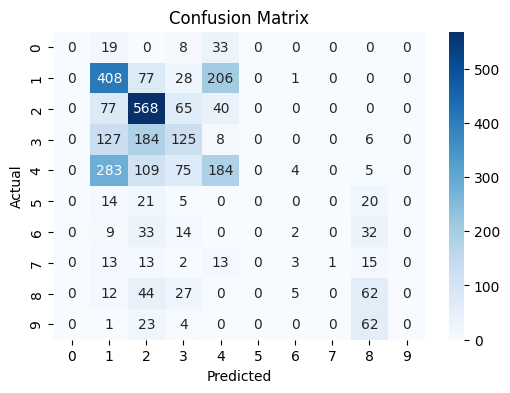

In [19]:
cm = confusion_matrix(y_test, y_pred_50)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [17]:
new_dataset_100 = X_train.iloc[:,features_100]
#Creating the object of model and fitting the data
nb_classifier_100 = MultinomialNB()
nb_classifier_100.fit(new_dataset_100, y_train)
#Predicting the test data
new_test_dataset_100 = X_test.iloc[:,features_100]
#Predicting the test data
y_pred_100 = nb_classifier_100.predict(new_test_dataset_100)
#Printing the accuracy score
accuracy_100 = accuracy_score(y_test, y_pred_100)
# Calculating precision for each class
precision_100 = precision_score(y_test, y_pred_100, average=None)
# Calculating recall score for each class
recall_100 = recall_score(y_test, y_pred_100, average=None)
# Calculating f1 score for each class
f1_100 = f1_score(y_test, y_pred_100, average=None)

print("========================================================")
print("Accuracy Score :", accuracy_100)
print("Precision Score :", precision_100)
print("Recall Score :", recall_100)
print("F1 Score :", f1_100)
print("========================================================")
print(classification_report(y_test, y_pred_100))
print("========================================================")

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score : 0.4961165048543689
Precision Score : [0.         0.52855407 0.53878407 0.36637931 0.50086059 0.66666667
 0.46153846 0.59259259 0.41520468 0.46153846]
Recall Score : [0.         0.60416667 0.68533333 0.37777778 0.44090909 0.3
 0.13333333 0.26666667 0.47333333 0.06666667]
F1 Score : [0.         0.56383668 0.60328638 0.37199125 0.46897663 0.4137931
 0.20689655 0.36781609 0.4423676  0.11650485]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.53      0.60      0.56       720
           2       0.54      0.69      0.60       750
           3       0.37      0.38      0.37       450
           4       0.50      0.44      0.47       660
           5       0.67      0.30      0.41        60
           6       0.46      0.13      0.21        90
           7       0.59      0.27      0.37        60
           8       0.42      0.47      0.44       150
           9       0.46      0.07      0.12     

Text(0.5, 1.0, 'Confusion Matrix')

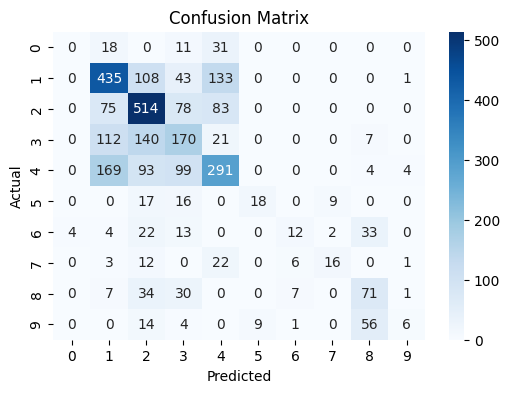

In [20]:
cm = confusion_matrix(y_test, y_pred_100)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [18]:
new_dataset_200 = X_train.iloc[:,features_200]
#Creating the object of model and fitting the data
nb_classifier_200 = MultinomialNB()
nb_classifier_200.fit(new_dataset_200, y_train)
#Predicting the test data
new_test_dataset_200 = X_test.iloc[:,features_200]
#Predicting the test data
y_pred_200 = nb_classifier_200.predict(new_test_dataset_200)
#Printing the accuracy score
accuracy_200 = accuracy_score(y_test, y_pred_200)
# Calculating precision for each class
precision_200 = precision_score(y_test, y_pred_200, average=None)
# Calculating recall score for each class
recall_200 = recall_score(y_test, y_pred_200, average=None)
# Calculating f1 score for each class
f1_200 = f1_score(y_test, y_pred_200, average=None)

print("========================================")
print("Accuracy Score :", accuracy_200)
print("Precision Score :", precision_200)
print("Recall Score :", recall_200)
print("F1 Score :", f1_200)
print("========================================================")
print(classification_report(y_test, y_pred_200))
print("========================================================")

Accuracy Score : 0.5074433656957928
Precision Score : [0.03448276 0.55509066 0.55513308 0.39922481 0.46544429 0.80645161
 0.55555556 0.88888889 0.51315789 0.57575758]
Recall Score : [0.01666667 0.55277778 0.584      0.45777778 0.5        0.41666667
 0.33333333 0.4        0.52       0.42222222]
F1 Score : [0.02247191 0.5539318  0.56920078 0.42650104 0.48210373 0.54945055
 0.41666667 0.55172414 0.51655629 0.48717949]
              precision    recall  f1-score   support

           0       0.03      0.02      0.02        60
           1       0.56      0.55      0.55       720
           2       0.56      0.58      0.57       750
           3       0.40      0.46      0.43       450
           4       0.47      0.50      0.48       660
           5       0.81      0.42      0.55        60
           6       0.56      0.33      0.42        90
           7       0.89      0.40      0.55        60
           8       0.51      0.52      0.52       150
           9       0.58      0.42      0

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Confusion Matrix')

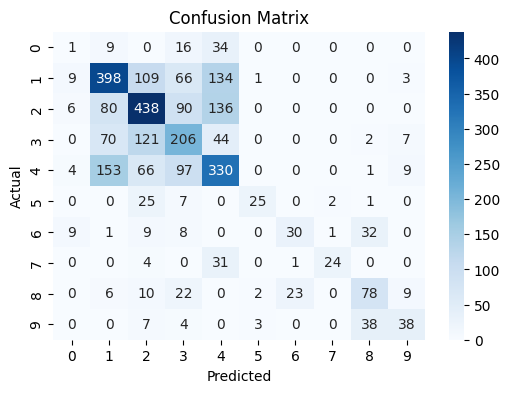

In [21]:
cm = confusion_matrix(y_test, y_pred_200)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")